In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import numpy as np

In [26]:
fes_polar99 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/fesxy99.grid', widths=[9,9,9], skiprows=9, header=None, names=['z','theta','fes'])
fes_polar99.dropna(how="all", inplace=True)
fes_polar120 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/fesxy120.grid', widths=[9,9,9], skiprows=9, header=None, names=['z','theta','fes'])
fes_polar120.dropna(how="all", inplace=True)

In [28]:
fes_polar140 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/fesxy140.grid', widths=[9,9,9], skiprows=9, header=None, names=['z','theta','fes'])
fes_polar140.dropna(how="all", inplace=True)
fes_zr = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/feszr140.grid', widths=[9,9,9], skiprows=9, header=None, names=['z','s','fes'])
fes_zr.dropna(how="all", inplace=True)

In [29]:
print(fes_polar140['fes'].max())
print(fes_polar140['fes'].min())

-13.142000000000001
-159.168


In [30]:
def plot_polar_fes(df):
    """Plot polar contour plot using free energy grid data in pandas df with cols:z,theta,fes"""
    
    z_unique = np.sort(df.z.unique())
    theta_unique = np.sort(df.theta.unique())
    values = df.pivot_table(index='z', columns='theta', values='fes').T.values
    
    # Fix missing grid data at theta=pi by duplicating the last row of fes values
    theta_unique = np.append(theta_unique, [3.142])
    values = np.append(values, [values[-1]], axis=0)
    
#     print(theta_unique)
#     print(z_unique)
#     print(values)
#     print(len(values))
#     print(len(values[0]))
#     print(len(theta_unique))
#     print(len(z_unique))
#     print(values[-1])
    
    z, theta = np.meshgrid(z_unique, theta_unique)
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(10,10))
    
    # Adjust plot orientation and labels
    #ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_theta_offset(1.12) #5.2)
    #ax.set_ylim(0, 20)
    ax.tick_params(labelbottom=False, grid_color="palegreen")
    ax.set_rticks([5, 10, 15, 20])
    ax.set_thetagrids([334, 64, 154, 244])
    ax.set_rlabel_position(270)
    
    # Plot contour, specifying limits for contour boundaries and colour palette
    cont = ax.contourf(theta, z, values, levels=np.arange(-160, 20, 5), cmap='Spectral')
    
    cb = fig.colorbar(cont)
    cb.set_label("Free Energy")
    
    plt.text(3.5, 16.8, "DIV", fontsize=24)
    plt.text(1.97, 15, "DIII", fontsize=24)
    plt.text(4.9, 15.8, "DI", fontsize=24)
    plt.text(0.4, 15, "DII", fontsize=24)
    
    return fig, ax, cont

Text(2, -14, 'INTRACELLULAR')

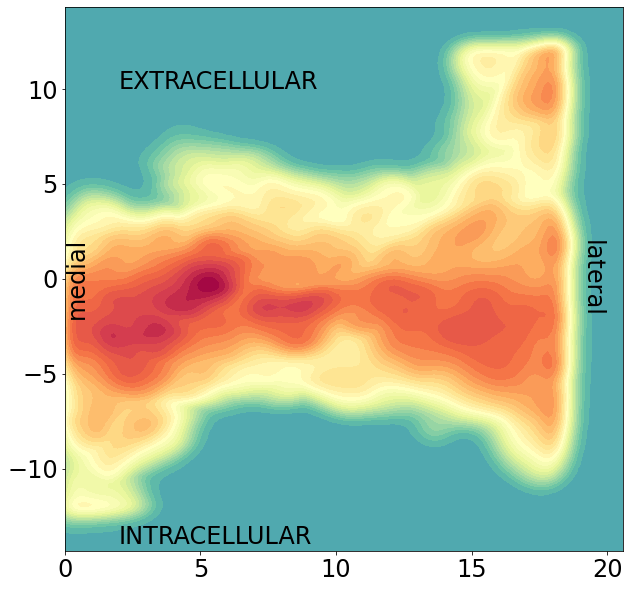

In [32]:
fig, axes = plt.subplots(figsize=(10, 10))
Z = fes_zr.pivot_table(index='z', columns='s', values='fes').T.values

X_unique = np.sort(fes_zr.z.unique())
Y_unique = np.sort(fes_zr.s.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

plt.contourf(X, Y, Z, levels=np.arange(-160, 20, 5), cmap='Spectral')

text(0, 0, "medial", rotation=90, verticalalignment='center')
text(19, 0, "lateral", rotation=270, verticalalignment='center')
text(2, 10, "EXTRACELLULAR")
text(2, -14, "INTRACELLULAR")

(<Figure size 720x720 with 2 Axes>,
 <PolarAxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7f3da4531850>)

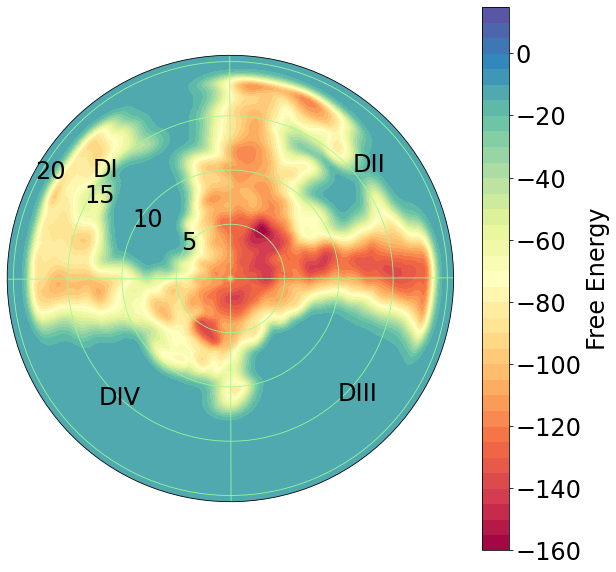

In [33]:
plot_polar_fes(fes_polar140)

(<Figure size 720x720 with 2 Axes>,
 <PolarAxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7f3da64cfbe0>)

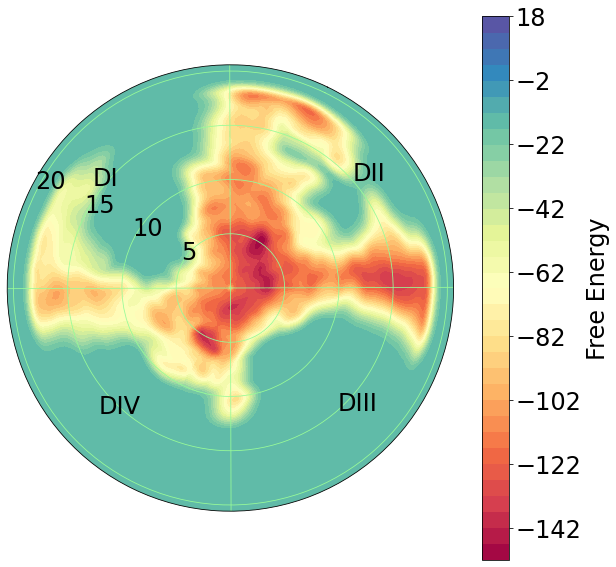

In [24]:
plot_polar_fes(fes_polar120)

# FES100

(<Figure size 720x720 with 2 Axes>,
 <PolarAxesSubplot:>,
 <matplotlib.contour.QuadContourSet at 0x7f3dc1003e80>)

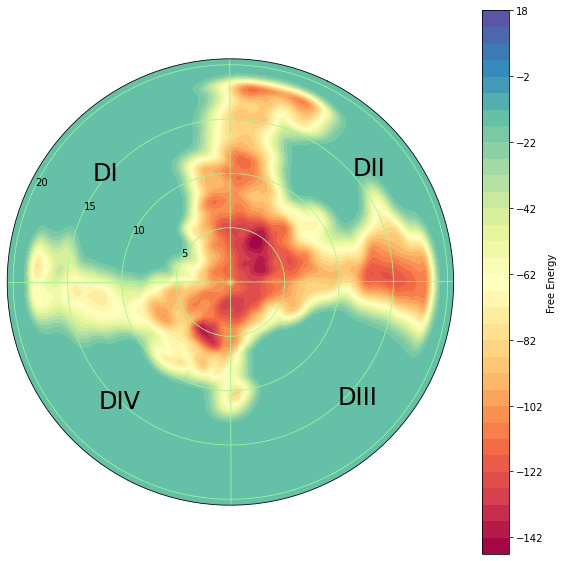

In [8]:
plot_polar_fes(fes_polar99)

In [35]:
dfhills = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.ALL140', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])

hills0 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.0', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])

hills5 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.5', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])
hills6 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.6', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])
hills7 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.7', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])
hills8 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.8', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])

hills1 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.1', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])
hills2 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.2', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])
hills3 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.3', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])
hills4 = pd.read_fwf('/mnt/sda1/elainetao/METAD_LQZ/AGF_WTMETAD/HILLS.4', header=None, 
                            names=["time", "s", "z", "theta", "sigma_s", "sigma_z", "sigma_theta", "heights", "biasfactor", "clock"],
                            comment='#', widths=[23,23,23,23,23,23,23,23,23,11])


In [36]:
hills0['walker'] = 0
hills5['walker'] = 5
hills6['walker'] = 6
hills7['walker'] = 7
hills8['walker'] = 8
hills1['walker'] = 1
hills2['walker'] = 2
hills3['walker'] = 3
hills4['walker'] = 4

hills0.drop(columns='time')
hills0['time'] = np.arange(2, len(hills0)*2+2, 2)
hills1.drop(columns='time')
hills1['time'] = np.arange(2, len(hills1)*2+2, 2)
hills2.drop(columns='time')
hills2['time'] = np.arange(2, len(hills2)*2+2, 2)
hills3.drop(columns='time')
hills3['time'] = np.arange(2, len(hills3)*2+2, 2)
hills4.drop(columns='time')
hills4['time'] = np.arange(2, len(hills4)*2+2, 2)
hills5.drop(columns='time')
hills5['time'] = np.arange(2, len(hills5)*2+2, 2)
hills6.drop(columns='time')
hills6['time'] = np.arange(2, len(hills6)*2+2, 2)
hills7.drop(columns='time')
hills7['time'] = np.arange(2, len(hills7)*2+2, 2)
hills8.drop(columns='time')
hills8['time'] = np.arange(2, len(hills8)*2+2, 2)

<AxesSubplot:xlabel='clock', ylabel='heights'>

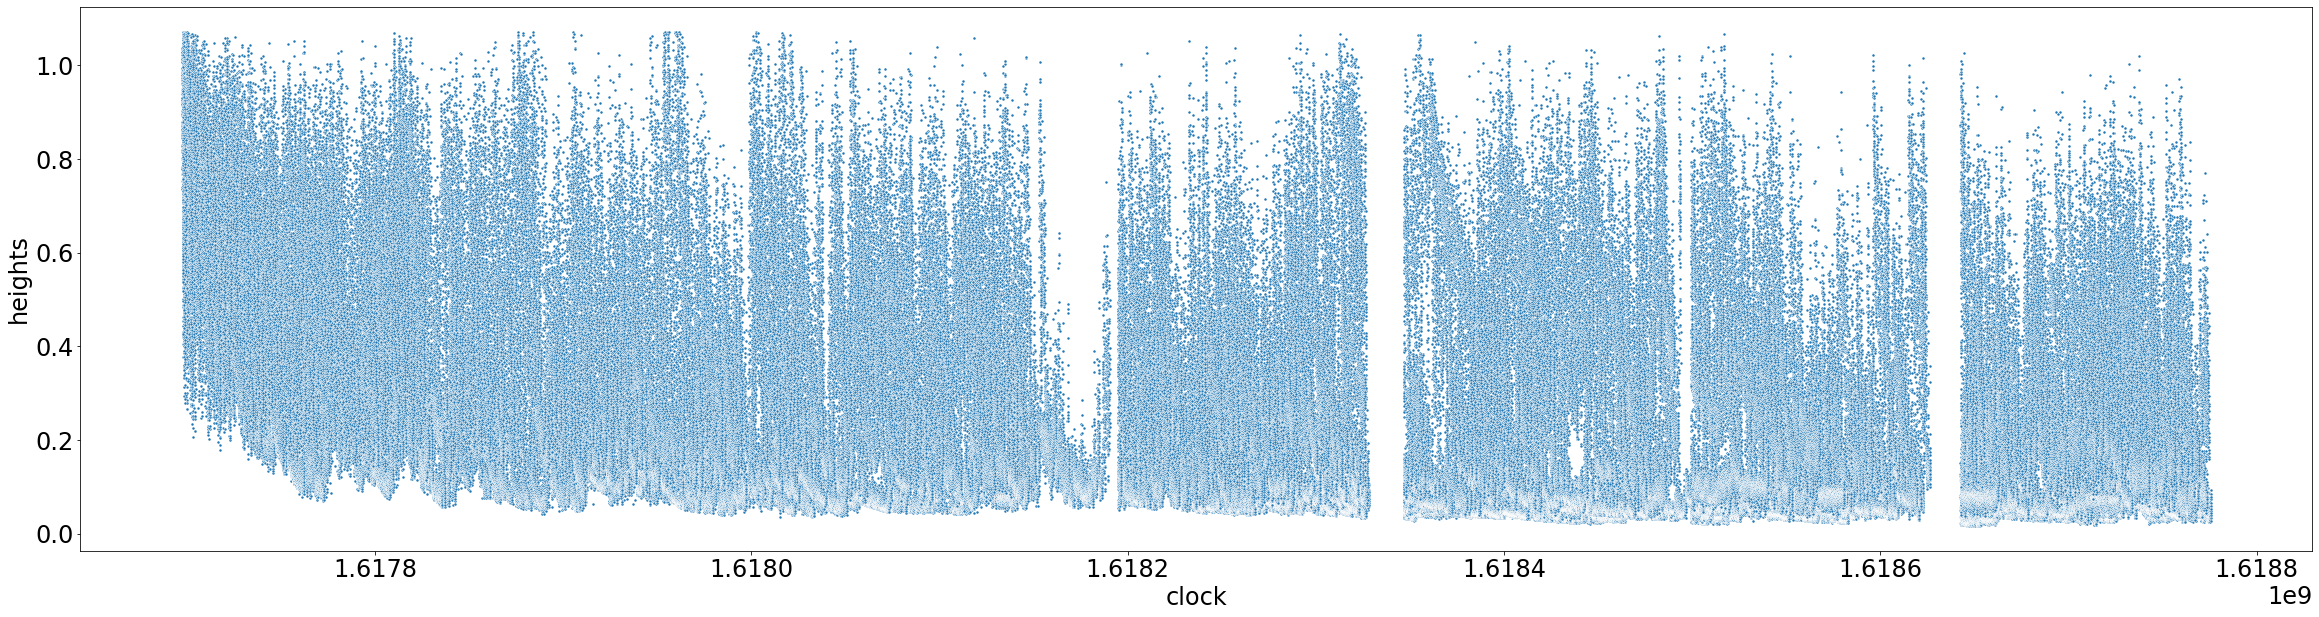

In [37]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.scatterplot(data=dfhills, x='clock', y='heights', marker='.')

# PLOT HILLS (walkers)

In [44]:
hills0['time'].iloc[-1] + hills1['time'].iloc[-1] + hills2['time'].iloc[-1] + hills3['time'].iloc[-1] + hills4['time'].iloc[-1] + hills5['time'].iloc[-1] + hills6['time'].iloc[-1] + hills7['time'].iloc[-1] + hills8['time'].iloc[-1]

1201052

<AxesSubplot:xlabel='time', ylabel='heights'>

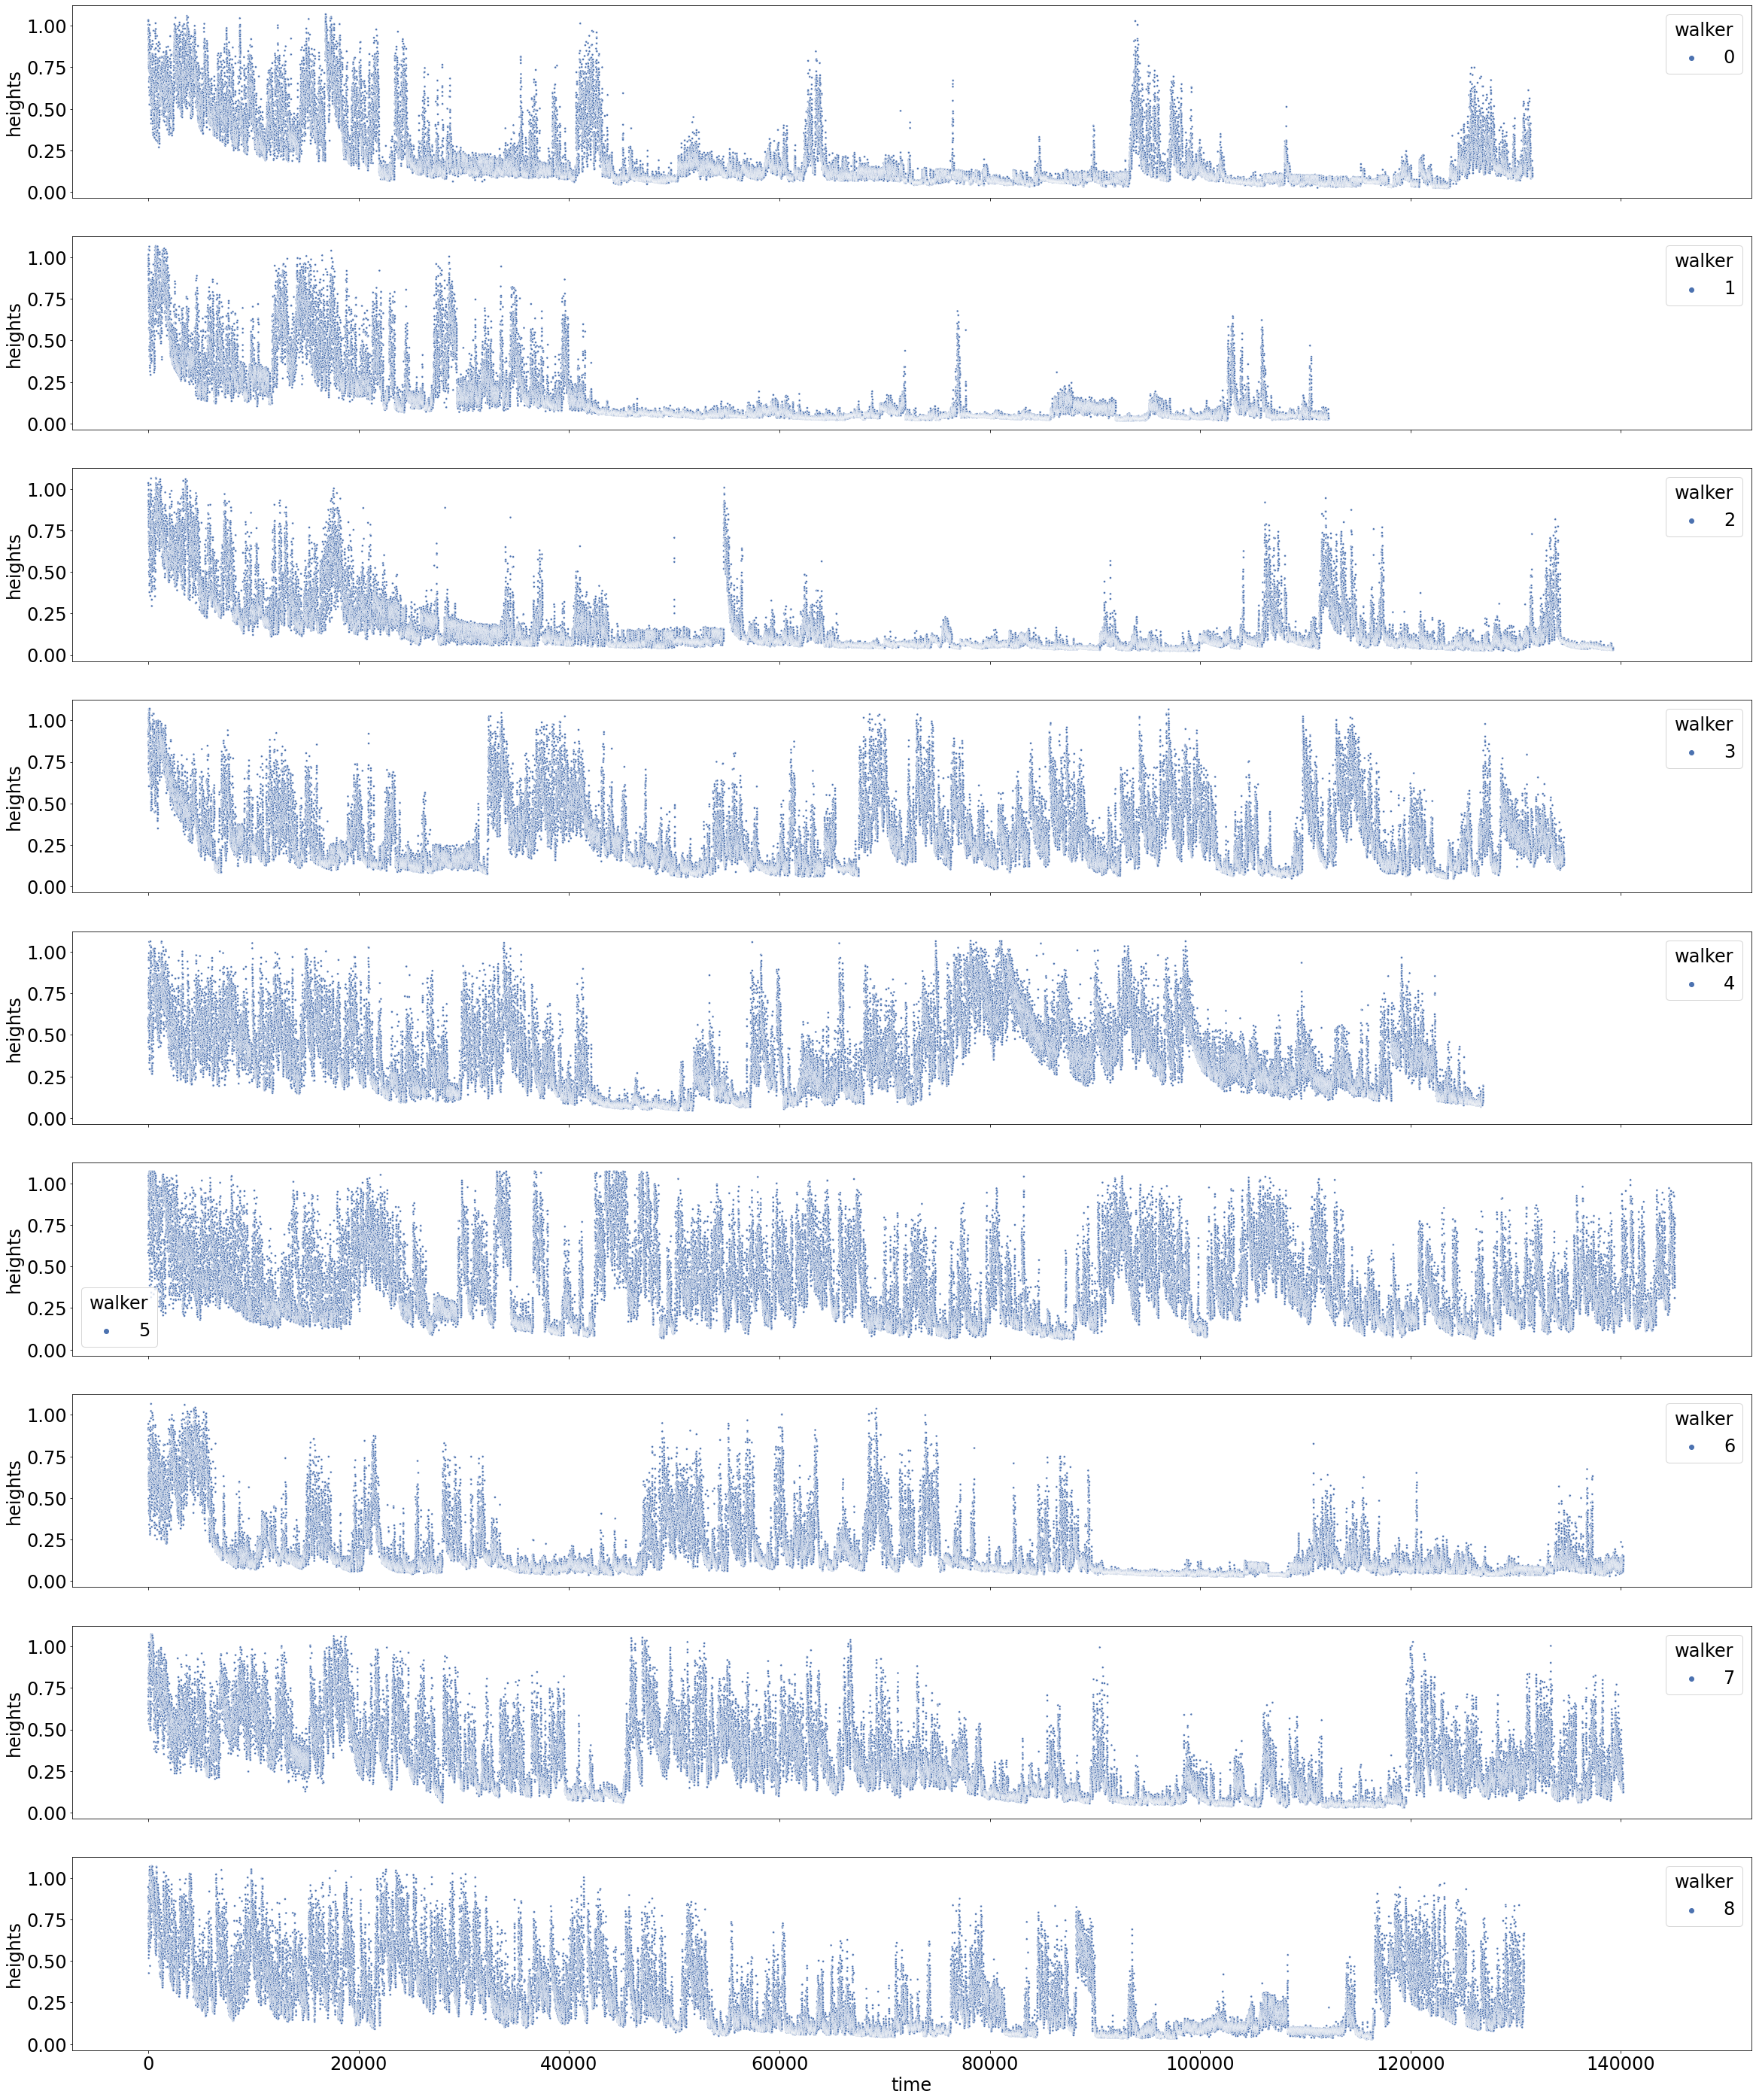

In [38]:
fig, axes = plt.subplots(9, 1, figsize=(40, 50), sharex=True, sharey=True)

sns.scatterplot(data=hills0, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[0])
sns.scatterplot(data=hills1, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[1])
sns.scatterplot(data=hills2, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[2])
sns.scatterplot(data=hills3, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[3])
sns.scatterplot(data=hills4, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[4])
sns.scatterplot(data=hills5, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[5])
sns.scatterplot(data=hills6, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[6])
sns.scatterplot(data=hills7, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[7])
sns.scatterplot(data=hills8, x='time', y='heights', hue='walker', marker='.', palette='deep', ax=axes[8])
